Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import Cleversys_Parser as cp
import behavior_miniscope as bm

Point to the path containing your cleversys .txt file

In [2]:
cleversys_txt = "\\\\penc8.rc.int.colorado.edu\\DonaldsonLab\\Sheeran\\miniscope_files\\test\\alignment_script\\2022_06_21\\211220 social memory pairs 1-6_1_TCR.txt"
print(cleversys_txt)

\\penc8.rc.int.colorado.edu\DonaldsonLab\Sheeran\miniscope_files\test\alignment_script\2022_06_21\211220 social memory pairs 1-6_1_TCR.txt


Parse cleversys .txt file into frame-by-frame df containing tracked data of interest (can change which columns are included in the ms_parse fxn in timestamp_align.py).

This df will be 1) imported into Bento for alignment with behavioral/neural data (e.g., videos, manual annotations, other sources of data input) and incorporation into a .annot file, and 2) also aligned with neural data in this notebook to generate some more frame-by-frame booleans for input into Bento (and, if you prefer, you can use this df to run all of your analysis outside of Bento)

In [3]:
#will take a bit of time
parsed_cs = bm.ms_parse(cleversys_txt, "cam1") #the second argument is the name of the minicam whose video you analyzed in cleversys
print(parsed_cs)

        CenterX(mm)  CenterY(mm)  NoseX(mm)  NoseY(mm)  DistanceSum(mm)_novel  \
0             503.0        160.0      466.0      170.0               0.000000   
1             503.0        160.0      537.0      155.0               0.000000   
2             503.0        160.0      537.0      155.0               0.000000   
3             503.0        160.0      540.0      160.0               0.000000   
4             503.0        160.0      537.0      155.0               0.000000   
...             ...          ...        ...        ...                    ...   
323671        807.0        236.0      800.0      210.0           28410.072169   
323672        806.0        235.0      795.0      210.0           28410.706379   
323673        805.0        236.0      795.0      210.0           28411.307304   
323674        805.0        236.0      795.0      210.0           28411.877879   
323675        805.0        236.0      795.0      210.0           28412.363219   

       [Center_Areas]_novel

Import and align all feeds' timestamp files

In [4]:
#point to paths containing timestamp files from each feed
ts_dir = "\\\\penc8.rc.int.colorado.edu\\DonaldsonLab\\Sheeran\\miniscope_files\\test\\alignment_script\\2022_06_21\\18_25_10"

scope_dir = os.path.join(ts_dir, "My_V4_Miniscope\\timeStamps.csv")
cam1_dir = os.path.join(ts_dir, "MiniCam1\\timeStamps_cam1.csv")
cam2_dir = os.path.join(ts_dir, "MiniCam2\\timeStampscam2.csv")

#load timestamp files
scope_ts = pd.read_csv(scope_dir)
cam1_ts = pd.read_csv(cam1_dir)
cam2_ts = pd.read_csv(cam2_dir)

#align files, using miniscope frames as reference
aligned_ts = bm.align_feeds(scope_dir,
                            cam1_dir,
                           cam2_dir)

print(aligned_ts)

      Frame Number  Time Stamp (ms)  Frame Number_cam1  Frame Number_cam2
0                0               -4                  0                  0
1                1               37                  2                  2
2                2               66                  3                  4
3                3               95                  5                  5
4                4              132                  6                  7
...            ...              ...                ...                ...
9070          9070           304810              14307              14307
9071          9071           304843              14309              14309
9072          9072           304877              14310              14311
9073          9073           304910              14312              14312
9074          9074           304945              14313              14314

[9075 rows x 4 columns]


Align the timestamps to your parsed cleversys output

In [5]:
cs_ts = bm.align_cleversys(parsed_cs, aligned_ts)
cs_ts

,CenterX(mm),CenterY(mm),NoseX(mm),NoseY(mm),DistanceSum(mm)_novel,[Center_Areas]_novel,[Nose_Areas]_novel,CenterX(mm)_partner,CenterY(mm)_partner,EventRule1,...,Frame Number_cam1,Time,distance_to_partner,distance_to_novel,distance_traveled,distance_traveled_partner,distance_traveled_novel,Frame Number,Time Stamp (ms),Frame Number_cam2
0,503.0,160.0,466.0,170.0,0.000000,"[left,left chamber]","[left,left chamber]",776.0,240.0,0,...,390,0.033367,284.480228,405.764710,0.0,0.0,0.000000,247,8299,390
1,503.0,160.0,537.0,155.0,0.000000,"[left,left chamber]","[left,left chamber]",776.0,240.0,0,...,391,0.066733,284.480228,405.034566,0.0,0.0,1.414214,248,8330,392
2,503.0,160.0,540.0,160.0,0.000000,"[left,left chamber]","[left,left chamber]",776.0,240.0,0,...,393,0.133467,284.480228,404.793775,0.0,0.0,1.000000,249,8365,393
3,503.0,160.0,537.0,155.0,0.000000,"[left,left chamber]","[left,left chamber]",775.0,240.0,0,...,395,0.200200,283.520722,404.793775,0.0,1.0,1.000000,250,8399,395
4,503.0,160.0,537.0,155.0,0.000000,"[left,left chamber]","[left,left chamber]",775.0,240.0,0,...,396,0.233567,283.520722,404.793775,0.0,0.0,0.000000,251,8430,396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8823,168.0,233.0,198.0,220.0,4324.394613,[],[],738.0,207.0,1,...,14307,464.397731,570.592674,56.356011,0.0,1.0,0.000000,9070,304810,14307
8824,167.0,233.0,198.0,223.0,4324.394613,[],[],738.0,207.0,1,...,14309,464.464464,571.591637,55.470713,0.0,0.0,0.000000,9071,304843,14309
8825,167.0,233.0,198.0,223.0,4324.394613,[],[],738.0,207.0,1,...,14310,464.497831,571.591637,55.470713,0.0,0.0,0.000000,9072,304877,14311
8826,168.0,233.0,198.0,223.0,4324.394613,[],[],738.0,207.0,1,...,14312,464.564565,570.592674,55.009090,0.0,0.0,0.000000,9073,304910,14312


Spatially bin the locations in the PPT chamber the test animal goes to (for place cell and possibly other analysis)
(50 mm is proabably a good bin size)

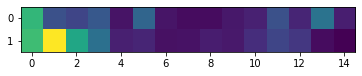

In [8]:
space_bins = bm.space_bin(cs_ts, 50, show_plot = True) #I think this plot is the occupancy plot per bin..?

In [14]:
space_bins

(array([[ 835.,  331.,  285.,  365.,   96.,  425.,  103.,   74.,   71.,
          109.,  144.,  334.,  159.,  495.,  135.],
        [ 866., 1242.,  748.,  478.,  137.,  158.,   86.,   93.,  130.,
          115.,  192.,  286.,  229.,   71.,   33.]]),
 array([ 99., 185., 271.]),
 array([ 56. , 109.2, 162.4, 215.6, 268.8, 322. , 375.2, 428.4, 481.6,
        534.8, 588. , 641.2, 694.4, 747.6, 800.8, 854. ]),
 [array([ 99., 185., 271.]),
  array([ 56. , 109.2, 162.4, 215.6, 268.8, 322. , 375.2, 428.4, 481.6,
         534.8, 588. , 641.2, 694.4, 747.6, 800.8, 854. ])])

In [ ]:
#PICK UP HERE
#still need to actually produce the boolean now that I have bins -- but need to first confirm bins are being made properly
#see space_bin() fxn code for details

In [ ]:
#first part (above) - make the boolean for spatial bins

#1) define bins
    #doing this based on animal's position. in my experience, animals will touch each wall during their behavior,
    #so i am using their max nose position to define the bounds of the chamber. From cleversys, the x length
    #of the chamber should be identical between sessions (if you set it correctly) but the y length may differ
    #given slight variations in the distortion of the camera
    #plan to use the same number of bins across sessoins, bc we will output the total number of bins the animal went into to
    #get a vague sense of whether the animal fully explored the space or not


In [ ]:
#second part - per Ann, for loading into bento 

#"organize your bin "bouts" into a struct with structure bouts.Ch1.(bin_ID) 
# [to] be able to pass that struct to Bento's saveAnnot function to output them in a .annot format 
# that could automatically be loaded into Bento

In [ ]:
#have not started

In case you want to analyze outside of Bento: slicing out the miniscope frames during partner/novel social interaction (xreference to your minian .mat file for analysis)

In [ ]:
#slice out the miniscope frames during which the test animal was interacting with either the novel or partner animal

interact_frames = cs_ts[['Frame Number','huddle_novel',
                         'huddle_partner',
                         'novel_dist_less_10cm',
                         'partner_dist_less_10cm',
                         'distance_to_novel',
                         'distance_to_partner']]

interact_frames

nhuddle_frames = interact_frames[interact_frames['huddle_novel']==1]
nhuddle_frames = nhuddle_frames[['Frame Number', 'huddle_novel']]

phuddle_frames = interact_frames[interact_frames['huddle_partner']==1]
phuddle_frames = phuddle_frames[['Frame Number', 'huddle_partner']]

ninteract_frames = interact_frames[interact_frames['novel_dist_less_10cm']==1]
ninteract_frames = ninteract_frames[['Frame Number', 'novel_dist_less_10cm']]

pinteract_frames = interact_frames[interact_frames['partner_dist_less_10cm']==1]
pinteract_frames = pinteract_frames[['Frame Number', 'partner_dist_less_10cm']]